In [1]:
import glob
import re

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import scienceplots

plt.style.use("science")

In [2]:
activations = ["sigmoid", "tanh", "relu", "JNB2", "JNB3", "JNB4", "JNB5", "JNB6"]
mapping = {
    "JNB2": "JNB(2)",
    "JNB3": "JNB(3)",
    "JNB4": "JNB(4)",
    "JNB5": "JNB(5)",
    "JNB6": "JNB(6)",
    "RELU": "ReLU",
    "SIGMOID": "Sigmoid",
    "TANH": "Tanh",
}
names = []
for i in range(0, len(activations)):
    names.append(mapping[activations[i].upper()])

In [3]:
DATA = []
SCORES = []
for activation in activations:
    files = sorted(glob.glob("data/*%s*.txt" % activation))
    data = []
    score = []
    for file in files:
        history, score_ = list(
            map(lambda t: eval(str.strip(t)), open(file).readlines())
        )
        d = (
            history["loss"],
            history["val_loss"],
            history["accuracy"],
            history["val_accuracy"],
        )
        data.append(d)
        score.append(score_)
    DATA.append(data)
    SCORES.append(score)
DATA = np.array(DATA)
SCORES = np.array(SCORES)
DATA.shape, SCORES.shape

((8, 5, 4, 30), (8, 5, 2))

In [4]:
log = lambda x: np.log(x) / np.log(50)
DATA[:, :, :2, :] = log(DATA[:, :, :2, :])
mean = (DATA).mean(axis=1)
var = (DATA).var(axis=1)

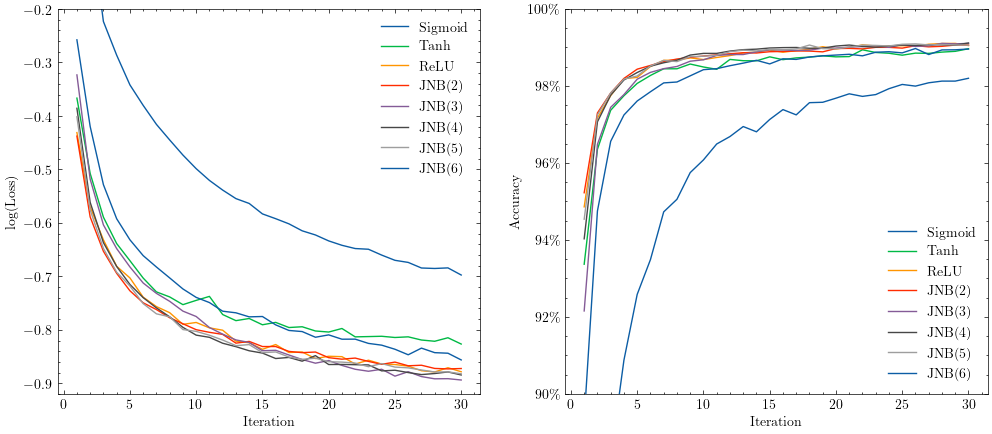

In [5]:
x = list(range(1, 1 + 30))


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
metric = 1
for i in range(0, len(activations)):
    activation = mapping[activations[i].upper()]
    axs[0].plot(x, mean[i, metric, :], label=activation)
    axs[0].fill_between(
        x,
        mean[i, metric, :] - var[i, metric, :],
        mean[i, metric, :] + var[i, metric, :],
        alpha=0.2,
    )
axs[0].legend()
axs[0].set_ylim(-0.92, -0.2)
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel(r"$\log(\text{Loss})$")

metric = 3
for i in range(0, len(activations)):
    activation = mapping[activations[i].upper()]
    axs[1].plot(x, mean[i, metric, :], label=activation)
    axs[1].fill_between(
        x,
        mean[i, metric, :] - var[i, metric, :],
        mean[i, metric, :] + var[i, metric, :],
        alpha=0.2,
    )
axs[1].legend()
axs[1].set_ylim(0.9, 1)
axs[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: "%d" % (100 * x) + "\%")
)
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Accuracy")

fig.savefig("compare-accuracy-mnist.pdf", bbox_inches="tight")

In [6]:
SCORES[:, :, 1] *= 100
mean = SCORES.mean(axis=1)
std = SCORES.std(axis=1)

columns = ["Loss", "Accuracy"]
df = pd.DataFrame(index=names, columns=columns)

# Populate DataFrame with mean +- std
for i in range(mean.shape[0]):
    for j in range(mean.shape[1]):
        df.at[names[i], columns[j]] = f"{mean[i, j]:.3f} +- {std[i, j]:.3f}"

df

,Loss,Accuracy
Sigmoid,0.061 +- 0.003,98.092 +- 0.094
Tanh,0.032 +- 0.002,98.904 +- 0.069
ReLU,0.026 +- 0.001,99.140 +- 0.043
JNB(2),0.025 +- 0.002,99.134 +- 0.048
JNB(3),0.022 +- 0.002,99.200 +- 0.079
JNB(4),0.022 +- 0.001,99.228 +- 0.052
JNB(5),0.025 +- 0.001,99.204 +- 0.047
JNB(6),0.029 +- 0.003,99.024 +- 0.120


In [7]:
df = pd.DataFrame(
    {
        "Loss mean": mean[:, 0],
        "Loss std": std[:, 0],
        "Accuracy mean": mean[:, 1],
        "Accuracy std": std[:, 1],
    },
    index=names,
)
df.round(4)

,Loss mean,Loss std,Accuracy mean,Accuracy std
Sigmoid,0.0611,0.0028,98.092,0.0937
Tanh,0.0322,0.0015,98.904,0.0695
ReLU,0.0256,0.0010,99.140,0.0434
JNB(2),0.0252,0.0017,99.134,0.0484
JNB(3),0.0224,0.0019,99.200,0.0787
JNB(4),0.0217,0.0008,99.228,0.0515
JNB(5),0.0249,0.0009,99.204,0.0467
JNB(6),0.0290,0.0028,99.024,0.1198
